# TIØ4317 Project

Group members:
- Frederick Johan Pretlove
- Fabian Stoltenberg
- Hans Kristian Bjørgo Kværum
- Hedda Flemmen Holum

## Problem statement

This project investigates how fluctuations in the oil price, and the Norwegian Krone (NOK) exchange rate influence the stock prices of selected companies listed on the Oslo Stock Exchange (OSE). By applying time-series analysis, we aim to determine the explanatory power of these external economic factors in stock price prediction.

We will retrieve historical data via APIs (Yahoo Finance and Norges Bank) and implement ARIMA and ARIMAX models (see explanations in the “Empirical Analysis” section). Our goal is to compare their predictive performance and assess whether incorporating oil prices and exchange rates improves stock price forecasts beyond a baseline ARIMA model. If these external factors enhance predictive accuracy, this would indicate a relationship between commodity prices, exchange rates, and stock prices.

To ensure model robustness, we will conduct diagnostic tests for stationarity, autocorrelation, and heteroscedasticity. The findings will provide insights into the relationship between macroeconomic factors and energy stock prices, offering valuable guidance to investors and analysts seeking to better understand market dynamics.


In [6]:
# Imports
import pandas as pd #For reading files + data manipulation
import matplotlib.pyplot as plt  #For plotting
import numpy as np  #For data manipulation and calculations

from statsmodels.tsa.arima.model import ARIMA #For ARIMA modelling

from sklearn.metrics import mean_squared_error #For model evaluation

In [7]:
# Load the processed data 
df_commodities = pd.read_excel('Data/Processed/DAILY_COMMODITY_PRICES.xlsx')[['Date','Price','% Change', 'Ticker']]
df_stocks = pd.read_excel('Data/Processed/DAILY_STOCK_PRICES.xlsx')[['Date', 'Price', '% Return', 'Ticker']]
df_exchange_rate = pd.read_excel('Data/Processed/DAILY_EXCHANGE_RATES.xlsx')[['Date','Mid', '% Change', 'Ticker']]

## Data

Our project utilizes three datasets covering the period from January 2018 to February 2025, providing the necessary historical information for our time-series analysis.

The first dataset consists of daily stock prices for selected companies listed on the Oslo Stock Exchange. In addition to stock prices, this dataset includes features such as trading volume, daily percentage return, cumulative return percentage, and stock ticker symbols.


In [8]:
df_stocks.head()

,Date,Price,% Return,Ticker
0,2018-01-02,361.27866,0.637107,YAR-NO
1,2018-01-03,364.70940,0.949610,YAR-NO
2,2018-01-04,363.85170,-0.235174,YAR-NO
3,2018-01-05,367.28247,0.942903,YAR-NO
4,2018-01-08,375.09702,2.127668,YAR-NO


The second dataset contains daily exchange rates of various currencies against the Norwegian Krone (NOK), including USD/NOK, GBP/NOK, EUR/NOK, and CHF/NOK. This dataset provides information on bid and ask prices, percentage changes, and corresponding ticker symbols, allowing us to assess the impact of currency fluctuations on stock prices.


In [9]:
df_exchange_rate.head()

,Date,Mid,% Change,Ticker
0,2018-01-02,8.370757,-0.273562,CHFNOK
1,2018-01-03,8.306228,-0.770886,CHFNOK
2,2018-01-04,8.296742,-0.114203,CHFNOK
3,2018-01-05,8.254831,-0.505150,CHFNOK
4,2018-01-08,8.278486,0.286559,CHFNOK


The third dataset includes daily prices of gas and oil over the same timeframe. Alongside commodity prices, the dataset also includes percentage changes and ticker symbols.

In [11]:
df_commodities.head()

,Date,Price,% Change,Ticker
0,2018-01-02,50.781433,68.251837,HHGAS-FDS
1,2018-01-03,50.641342,-0.275871,HHGAS-FDS
2,2018-01-04,37.605713,-25.741081,HHGAS-FDS
3,2018-01-05,37.438774,-0.443919,HHGAS-FDS
4,2018-01-08,23.359003,-37.607457,HHGAS-FDS


The data was retrieved through Sparebank 1's internal database, as one of our group members has access. Before analysis, we conducted preprocessing steps, including handling missing values, aligning timestamps across datasets, and standardizing variables to ensure consistency.

For our empirical analysis, we focus on oil prices as our commodity variable and use the mean exchange rate (the average of the four exchange rates) to capture broader currency fluctuations. These variables are selected based on their potential impact on stock prices and their relevance to the Norwegian energy sector.


To get a better understanding of the data we are dealing with, we performed Exploratory Data Analysis (EDA).

### Stock price development for different stocks from 2018 to 2025

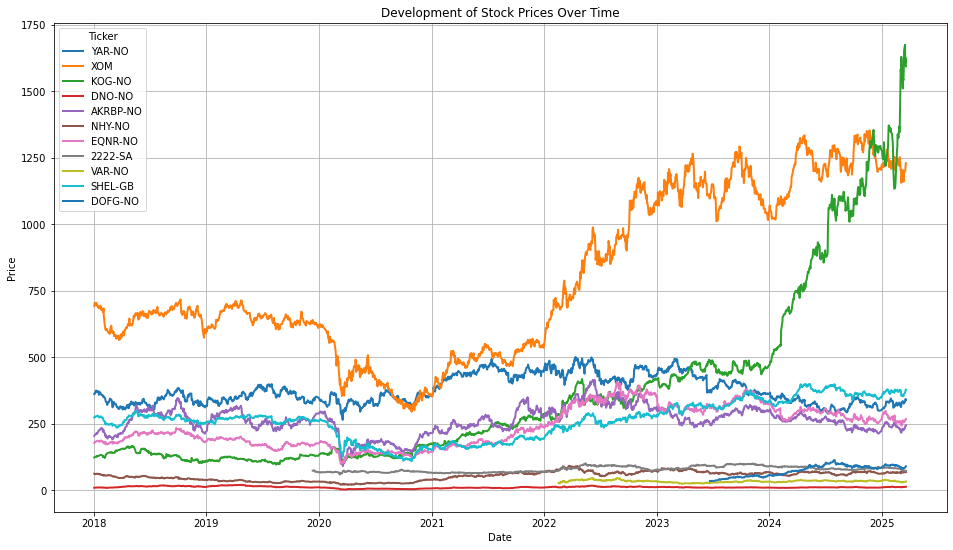

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
stock_prices = pd.read_excel('Data/Processed/DAILY_STOCK_PRICES.xlsx')

# Ensure the date is in the correct datetime format (if not already)
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'])

# Get unique tickers
unique_tickers = stock_prices['Ticker'].unique()

# Prepare the plot
plt.figure(figsize=(16, 9))  # Specify a larger figure size for better clarity

# Generate a plot for each ticker
for ticker in unique_tickers:
    # Filter data for the current ticker
    data = stock_prices[stock_prices['Ticker'] == ticker]
    
    # Plotting
    plt.plot(data['Date'], data['Price'], label=f'{ticker}', marker='', linestyle='-', linewidth=2)

plt.title('Development of Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='Ticker', loc='upper left')  # Legend with title
plt.grid(True)  # Adding grid for better readability
plt.show()

### Development of the oil price from 2018 to 2025

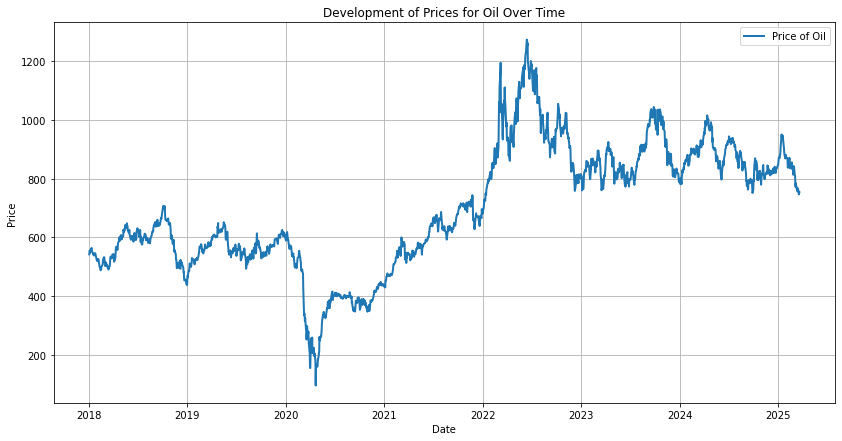

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
commodity_prices = pd.read_excel('Data/Processed/DAILY_COMMODITY_PRICES.xlsx')

# Ensure the date is in the correct datetime format (if not already)
commodity_prices['Date'] = pd.to_datetime(commodity_prices['Date'])


data = commodity_prices[commodity_prices['Ticker'] == 'OILDB-FDS']

# Create a graph for the oil price development
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Price'], label=f'Price of Oil', marker='', linestyle='-', linewidth=2)
plt.title(f'Development of Prices for Oil Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### Development of exchange rates

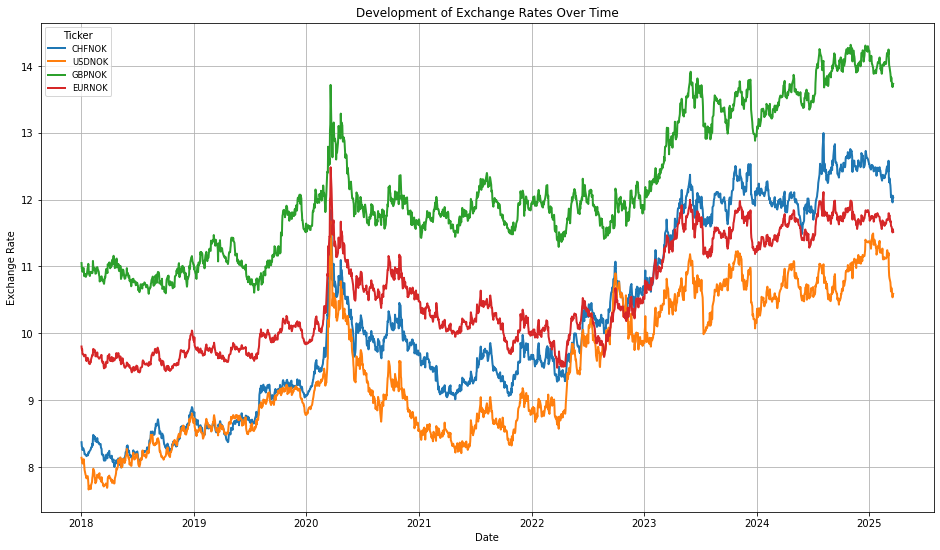

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
exchange_rates = pd.read_excel('Data/Processed/DAILY_EXCHANGE_RATES.xlsx')

# Ensure the date is in the correct datetime format (if not already)
exchange_rates['Date'] = pd.to_datetime(exchange_rates['Date'])

# Get unique tickers
unique_tickers = exchange_rates['Ticker'].unique()

# Prepare the plot
plt.figure(figsize=(16, 9))  # Set a larger figure size for better clarity

# Generate a plot for each ticker
for ticker in unique_tickers:
    # Filter data for the current ticker
    data = exchange_rates[exchange_rates['Ticker'] == ticker]
    
    # Plotting
    plt.plot(data['Date'], data['Mid'], label=f'{ticker}', marker='', linestyle='-', linewidth=2)

plt.title('Development of Exchange Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend(title='Ticker', loc='upper left', fontsize='small')  # Legend with title and adjust font size if needed
plt.grid(True)  # Adding grid for better readability
plt.show()

### Graphing energy stocks alongside oil price

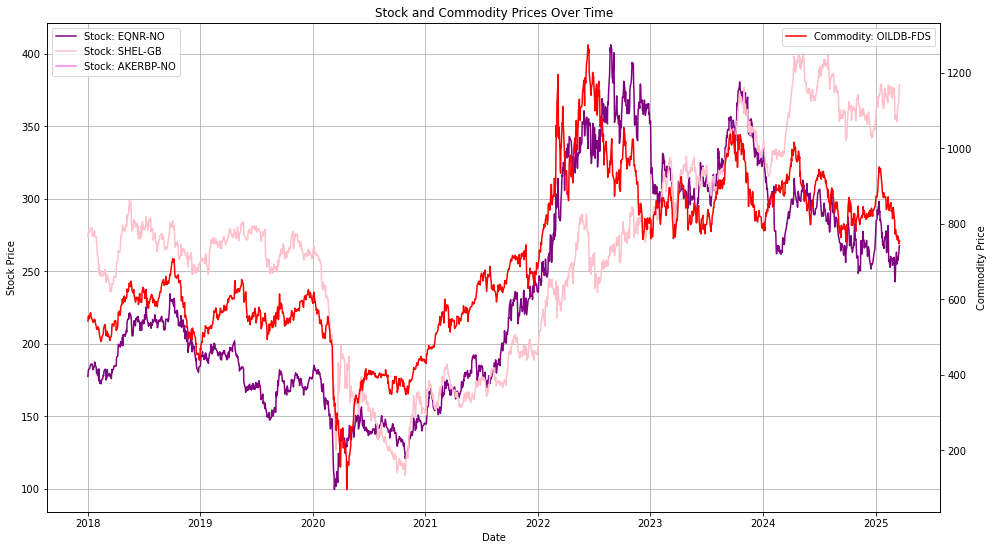

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
stock_prices = pd.read_excel('Data/Processed/DAILY_STOCK_PRICES.xlsx')
commodity_prices = pd.read_excel('Data/Processed/DAILY_COMMODITY_PRICES.xlsx')

# Ensure the date is in the correct datetime format
stock_prices['Date'] = pd.to_datetime(stock_prices['Date'])
commodity_prices['Date'] = pd.to_datetime(commodity_prices['Date'])

# Define the stocks and commodities to plot, with specific colors
stocks = {
    'EQNR-NO': 'purple',
    'SHEL-GB': 'pink',
    'AKERBP-NO': 'violet'
}
commodities = {
    'OILDB-FDS': 'red',
    #'HHGAS-FDS': 'blue',
    #'AECOCAD-FDS': 'green'
}

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(16, 9))

# Plot each stock on ax1
for stock, color in stocks.items():
    data = stock_prices[stock_prices['Ticker'] == stock]
    ax1.plot(data['Date'], data['Price'], label=f'Stock: {stock}', color=color)

# Set labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price')
ax1.set_title('Stock and Commodity Prices Over Time')

# Create a second y-axis for the commodities
ax2 = ax1.twinx()
for commodity, color in commodities.items():
    data = commodity_prices[commodity_prices['Ticker'] == commodity]
    ax2.plot(data['Date'], data['Price'], label=f'Commodity: {commodity}', linestyle='-', color=color)

# Set secondary y-axis label
ax2.set_ylabel('Commodity Price')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Add grid and show plot
ax1.grid(True)
plt.show()


As can be seen from the plot above, the stock prices of Norwegian energy companies seem to follow the fluctuations of the oil price. It will therefore be interesting to investigate whether the stock price has some explanatory power on the stock price.

<h3 style="color:red;">Include graph here with energy sector stocks alongside mean exchange rate - with updated mean calculation (@Hans Kristian)</h3>


In [20]:
# Insert code here

<span style="color:red;">Add insight about exchange rate vs. stocks here<span>

## Empirical Analysis

In this section we will describe how we performed our empirical analysis. As mentioned in the problem statement, we implemented two time-series models; the ARIMA and ARIMAX models. 

ARIMA (AutoRegressive Integrated Moving Average) is a time-series forecasting model that relies on past values of the target variable and errors to make predictions. It consists of three components: the AutoRegressive (AR) part, which incorporates past values of the series; the Integrated (I) part, which ensures stationarity through differencing; and the Moving Average (MA) part, which accounts for past forecast errors. Since ARIMA only considers the historical behavior of the target variable without any external influences, it is classified as a univariate model.

ARIMAX (ARIMA with Exogenous Variables) extends ARIMA by incorporating external factors that may influence the target variable. In addition to the AR, I, and MA components, ARIMAX includes exogenous variables (X), which help explain variations in the target series. By integrating external variables, ARIMAX becomes a multivariate model, improving forecasting accuracy if the chosen factors have significant predictive power.


## 